<a href="https://colab.research.google.com/github/SaudAltamimi/DSND-Starbucks_Capstone_Project/blob/master/Starbucks_Capstone_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview



##  Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

In [1]:
# Downloading the data from github 
!git clone https://github.com/SaudAltamimi/DSND-Starbucks_Capstone_Project.git
# updating pandas library
!pip3 install --upgrade pandas 

Cloning into 'DSND-Starbucks_Capstone_Project'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 5), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
     |████████████████████████████████| 10.5MB 2.8MB/s 
     |████████████████████████████████| 235kB 52.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.5.3
    Uninstalling python-dateutil-2.5.3:
      Successfully uninstalled python-dateutil-2.5.3
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


# Reading the data

In [0]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns 
%matplotlib inline

# read in the json files
path_to_data = 'DSND-Starbucks_Capstone_Project/data/'
portfolio = pd.read_json(path_to_data + 'portfolio.json', orient='records', lines=True)
profile = pd.read_json(path_to_data + 'profile.json', orient='records', lines=True)
transcript = pd.read_json(path_to_data + 'transcript.json', orient='records', lines=True)

# Problem Statement

## Data Sets description and view

### The data is contained in three files:


####portfolio.json



> portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)

**The schema and explanation of each variable:**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational.
> **BOGO**: buy one get one free.
> **Informational**: an advertisement for a drink. 

* difficulty (int) - minimum required spend to complete an offer.
* reward (int) - reward given for completing an offer.
* duration (int) - time for offer to be open, in days (validity period).
> Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.
* channels (list of strings),
 > ['email', 'mobile', 'social', 'web']


In [2]:
display(portfolio.head(2))
display(portfolio.shape)
print("\nNULLS precentages for each column:\n")
display(portfolio.isna().mean())

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


(10, 6)


NULLS precentages for each column:



reward        0.0
channels      0.0
difficulty    0.0
duration      0.0
offer_type    0.0
id            0.0
dtype: float64

> We have 10 types of offer.

In [3]:
# What type of offer do we have the most?
print("Offer types and it's counts :" )
(portfolio.offer_type.value_counts())

Offer types and it's counts :


bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

####profile.json



> profile.json - demographic data for each customer

**The schema and explanation of each variable:**

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
> Another feature can be extracted from this, time passed since this customer was added as a member (days).  

* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income



In [0]:
display(profile.head(2))
display(profile.shape)
print("\nNULLS precentages for each column:\n")
display(profile.isna().mean())

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0


(17000, 5)


NULLS precentages for each column:



gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

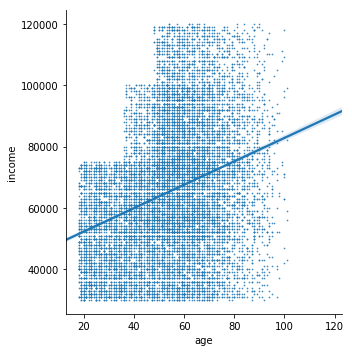

In [0]:
# Could we predict the missing income using the age only? 
# Using simple regrission? 
# Ans: we can't do this as seen from the plot below, 
 # due to the unrealistic simulated data.
 # But, We can give it a try and see how accurate we can get.
display(
    sns.lmplot(data=profile,
                   x='age',
                   y='income',
                   scatter_kws={"s": 0.5}
               )
    );



####transcript.json


> transcript.json - records for transactions, offers received, offers viewed, and offers completed

**The schema and explanation of each variable:**

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [0]:
display(transcript.head(2))
display(transcript.shape)
print("\nNULLS precentages for each column:\n")
display(transcript.isna().mean())

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


(306534, 4)


NULLS precentages for each column:



person    0.0
event     0.0
value     0.0
time      0.0
dtype: float64

In [0]:
# What kind of events do we have? 
transcript.event.value_counts('%')

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [5]:
# Taking one person as an example of what's happening in the data? 
print('A history example of one person:')
transcript[transcript.person.isin(['78afa995795e4d85b5d9ceeca43f5fef'])]

A history example of one person:


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


# Intersting questions raised



*   List item
*   List item



## Setting Goals


1.   We would like to help business to identify what kind of people who are likely would be influnced by a sepicifc offer (or many offers), from those who are not.
2.   We would also need to indetify people who do not need any offer to be influnced.

### The final dataset that could help us achieve those goals:

We would need a complete track of each person history, a records of his interactions with the offers and his average transaction (an overall average and a time series average) to be able to identify how important this customer to the business. So, In adition to the demographic that we have, we could add more features to it like:

1. How long is the customer been a member for the starbux app? (current_date - became_member_on).
2. Overall average transaction for each customer.
3. An average weekly transaction for each customer (How much each customer would pay each week?).
> Choosing a week is an arbitrary choice , This could be changed to two weeks or a month, it has to be discussed with the business. 
4. A score for each offer type (10 features), between 1 and -1, indicating how likely each customer will be influnced by a specific offer.
> How can we create such a score? We could create a score counter for each customer from the trascript table, if the customer has influnced by a specific offer (offer completed), then add 1, if he has not, then add -1, otherwise give him the counter would be 0, which indicates that he either has not seen the offer or has not recieved it at all. And then averaging those score would give a score between 1 and -1 (if the counts of -1 more then the counts of 1, then the score would be closer to -1, the oppiste is the same).





# Explortary Data Analysis 
> This section is for answering and commenting on each question raised above.

> It will also contains addressing some of the data issues that are present to be corrected in the next section.

# Data Cleaning & Preprossing

#### Cleansing the demographic data
> The problem with this data was the missing data for in gender & income columns, we could clean this using predctions, age would be an identifier of the income, and then using income and age to predict the gender type. 


In [0]:
# predicting income using age as features with regrission? 
features = 

targets = 

# fitting the model

# Testing how well the model can work? 
# using k-fold cross validation

# predicting the missing data



In [0]:
# Predicting the gender type using income & age as features.
features = 

targets = 

# fitting the model

# Testing how well the model can work? 
# using k-fold cross validation

# predicting the missing data


#### Cleansing the value column in the trasncript data:
